+ **NOTE**: This notebook is trained on Google Colaboratory

# Using TensorFlow-Hub

In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# content image path from directory
content_img_path = '/content/drive/My Drive/Colab Notebooks/YellowLabrador.jpg'
content_img = tf.keras.preprocessing.image.load_img(content_img_path, target_size=(256, 256), color_mode='rgb')
content_img_tensor = tf.keras.preprocessing.image.img_to_array(content_img)
content_img_tensor = content_img_tensor/255.0

In [0]:
# style image path from directory
style_img_path = '/content/drive/My Drive/Colab Notebooks/VassilyKandinsky.jpg'
style_img = tf.keras.preprocessing.image.load_img(style_img_path, target_size=(256, 256), color_mode='rgb')
style_img_tensor = tf.keras.preprocessing.image.img_to_array(style_img)
style_img_tensor = style_img_tensor/255.0

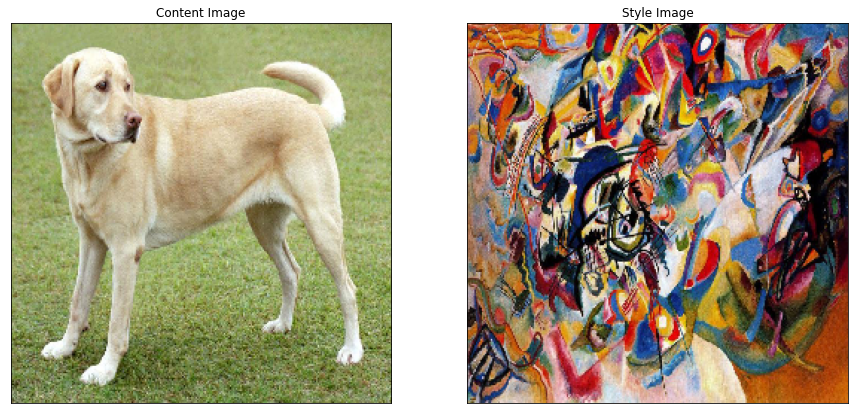

In [4]:
plt.figure(figsize=(15, 7))

for i, j in enumerate(zip(['Content Image', 'Style Image'], [content_img_tensor, style_img_tensor])):
    plt.subplot(1, 2, i+1)
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    plt.title(j[0])
    plt.imshow(j[1])

In [0]:
# expanding dimensions
content_img_tensor = np.expand_dims(content_img_tensor, axis=0)
style_img_tensor = np.expand_dims(style_img_tensor, axis=0)

In [0]:
# Load image stylization module.
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [0]:
# Stylize image.
outputs = hub_module(tf.constant(content_img_tensor), tf.constant(style_img_tensor))

In [8]:
outputs

[<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
 array([[[[0.412215  , 0.5180824 , 0.7184799 ],
          [0.16067061, 0.1942152 , 0.34058967],
          [0.6432968 , 0.71831733, 0.78240263],
          ...,
          [0.62820446, 0.660567  , 0.5743881 ],
          [0.8021827 , 0.8151393 , 0.74504685],
          [0.77400696, 0.7827449 , 0.7008245 ]],
 
         [[0.42256328, 0.53171057, 0.73965406],
          [0.1599296 , 0.20136529, 0.36250117],
          [0.65490264, 0.7282715 , 0.79838204],
          ...,
          [0.7377346 , 0.7324308 , 0.70600003],
          [0.84942   , 0.84123224, 0.8206472 ],
          [0.8177335 , 0.8037743 , 0.77983093]],
 
         [[0.42007533, 0.53768694, 0.7497092 ],
          [0.150927  , 0.19481431, 0.36212313],
          [0.63731587, 0.71301836, 0.79581517],
          ...,
          [0.5226116 , 0.49700257, 0.5274556 ],
          [0.68401784, 0.64603   , 0.69441426],
          [0.6757304 , 0.61549276, 0.6768506 ]],
 
         ...,
 
       

In [9]:
plt.figure(figsize=(15, 7))
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title('Stylized Image')
plt.imshow(outputs[0].numpy()[0])

# Without using TensorFlow-Hub

## Importing Libraries

In [0]:
import tensorflow as tf
import numpy as np
import PIL

import matplotlib.pyplot as plt
%matplotlib inline

## Setting the Image-Path

In [0]:
# content image path from directory
content_path = '/content/drive/My Drive/Colab Notebooks/YellowLabrador.jpg'

# style image path from directory
style_path = '/content/drive/My Drive/Colab Notebooks/VassilyKandinsky.jpg'

## Loading the Image

+ Considering max dimensions to be **512**.
+ Resizing the input image to max dimensions.
+ Converting img object to array.
+ Finally, expanding the dimensions of the image.

In [0]:
def load_img(path_to_img):
    max_dim = 512
    img = PIL.Image.open(path_to_img)
    long = max(img.size)
    scale = max_dim/long
    img = img.resize((round(img.size[0]*scale), round(img.size[1]*scale)), PIL.Image.ANTIALIAS)
    
    img = tf.keras.preprocessing.image.img_to_array(img)

    # We need to broadcast the image array such that it has a batch dimension 
    img = np.expand_dims(img, axis=0)
    return img

## Displaying the Image

+ Converting the 4D-image to 3D-image

In [0]:
def imshow(img, title=None):
    # Remove the batch dimension
    if len(img.shape) == 4:
        out = np.squeeze(img, axis=0)
    else:
        out = img.copy()

    # Normalize for display 
    out = out.astype('uint8')

    if title is not None:
        plt.title(title)

    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    plt.imshow(out)

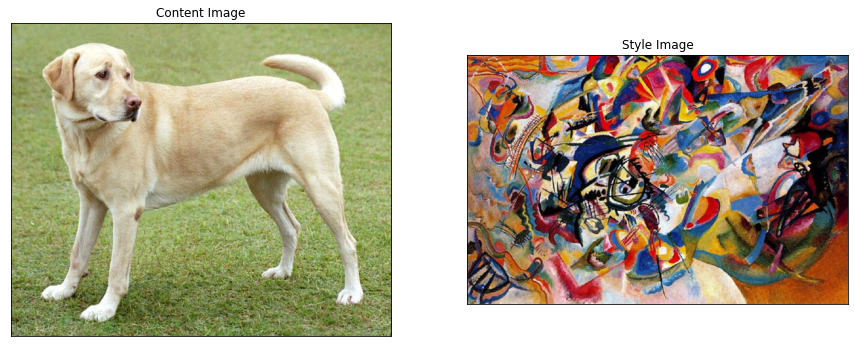

In [14]:
plt.figure(figsize=(15, 7))

content = load_img(content_path).astype('uint8')
style = load_img(style_path).astype('uint8')

plt.subplot(1, 2, 1)
imshow(content, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style, 'Style Image')

## Preparing the Data

+ Performing the same preprocessing process as are expected according to the VGG training process.
+ VGG networks are trained on image with each channel normalized by mean = [103.939, 116.779, 123.68] and with channels BGR.

In [0]:
def load_and_process_img(path_to_img):
    img = load_img(path_to_img)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

+ In order to view the outputs of our optimization, we are required to perform the inverse preprocessing step.
+ Furthermore, since our optimized image may take its values anywhere between  −∞  and  ∞ , we must clip to maintain our values from within the 0-255 range.

In [0]:
def deprocess_img(processed_img):
    x = processed_img.copy()
    if len(x.shape) == 4:
        x = np.squeeze(x, 0)
    assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                                "dimension [1, height, width, channel] or [height, width, channel]")
    if len(x.shape) != 3:
        raise ValueError("Invalid input to deprocessing image")
    
    # perform the inverse of the preprocessing step
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]

    x = np.clip(x, 0, 255).astype('uint8')
    return x

## Selecting layers for Content & Style Images

+ In order to get both the content and style representations of our image, we will look at some intermediate layers within our model.

In [0]:
# Content layer we are interested in
content_layers = ['block5_conv2'] 

# Style layer we are interested in
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1'
               ]

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

## Building a Model

+ We’ll load our pretrained image classification network.
+ Then we grab the layers of interest as we defined earlier.
+ Then we define a Model by setting the model’s inputs to an image and the outputs to the outputs of the style and content layers.
+ In other words, we created a model that will take an input image and output the content and style intermediate layers!

In [0]:
def get_model():
    """ Creates our model with access to intermediate layers. 
    
    This function will load the VGG19 model and access the intermediate layers. 
    These layers will then be used to create a new model that will take input image
    and return the outputs from these intermediate layers from the VGG model. 
    
    Returns:
        returns a keras model that takes image inputs and outputs the style and 
        content intermediate layers. 
    """
    
    # Load our model. We load pretrained VGG, trained on imagenet data
    vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    # Get output layers corresponding to style and content layers 
    style_outputs = [vgg.get_layer(name).output for name in style_layers]
    content_outputs = [vgg.get_layer(name).output for name in content_layers]
    model_outputs = style_outputs + content_outputs

    # Build model 
    return tf.keras.models.Model(vgg.input, model_outputs)

## Computing Content-Loss

+ The content loss function ensures that the activations of the **higher** layers are similar between the content image and the generated image.
+ $L^l_{content}(c, g) = \sum_{i, j} (A^l_{ij}(c) - A^l_{ij}(g))^2$
+ $A^l_{ij}(c)$ represents activation of $l^{th}$ layer, $i^{th}$ feature map & $j^{th}$ position obtained using the content-image
+ $A^l_{ij}(g)$ represents activation of $l^{th}$ layer, $i^{th}$ feature map & $j^{th}$ position obtained using the generated-image

In [0]:
def get_content_loss(target, gen_content):
    return tf.math.reduce_mean(tf.square(target - gen_content))

+ Using [tf.math.reduce_mean](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean) to compute the mean of elements across dimensions of a tensor.

## Computing Style-Loss

+ The style loss function makes sure that the correlation of activations in all the layers are similar between the style image and the generated image.
+ $L_{style}(c, g) = \sum_{l \in L} w_l E_l$
+ We weight the contribution of each layer's loss by some factor $w_l$. In our case, we weight each layer equally ($w_l =\frac{1}{|L|}$)
+ $E_l = \frac{1}{4N_l^2M_l^2} \sum_{i,j}(G^l_{ij}(s) - G^l_{ij}(g))^2$
+ $N_l$ describes the number of feature maps, each of size $M_l = height * width$.
+ $G^l_{ij}(I) = \sum_k A^l_{ik}(I)*A^l_{jk}(I)$
+ 'G' is referred to as 'Gram Matrix' & $G^l_{ij}$ is the inner product between the vectorized feature map $i$ and $j$ in layer $l$.
+ $A^l_{ij}(I)$ represents activation of $l^{th}$ layer, $i^{th}$ feature map & $j^{th}$ position obtained using the image

In [0]:
def gram_matrix(input_tensor):
    # We make the image channels first 
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)

In [0]:
def get_style_loss(gram_target, gen_style):
    """Expects two images of dimension h, w, c"""
    # height, width, num filters of each layer
    # We scale the loss at a given layer by the size of the feature map and the number of filters
    height, width, channels = gen_style.get_shape().as_list()
    gram_style = gram_matrix(gen_style)
    
    return tf.math.reduce_mean(tf.square(gram_target - gram_style))      # / (4. * (channels ** 2) * (width * height) ** 2)

## Computing Feature Representations

+ A little helper function that will load our content and style image, feed them forward through our network, which will then output the content and style feature representations from our model.

In [0]:
def get_feature_representations(model, content_path, style_path):
    """Helper function to compute our content and style feature representations.

    This function will simply load and preprocess both the content and style 
    images from their path. Then it will feed them through the network to obtain
    the outputs of the intermediate layers. 
    
    Arguments:
        model: The model that we are using.
        content_path: The path to the content image.
        style_path: The path to the style image
        
    Returns:
        returns the style features and the content features. 
    """
    # Load our images in 
    content_image = load_and_process_img(content_path)
    style_image = load_and_process_img(style_path)
    
    # batch compute content and style features
    style_outputs = model(style_image)
    content_outputs = model(content_image)
    
    # Get the style and content feature representations from our model  
    style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
    content_features = [content_layer[0] for content_layer in content_outputs[num_style_layers:]]
    return style_features, content_features

## Computing the Loss

+ It computes the total loss by taking both content & style loss into consideration.

In [0]:
def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
    """This function will compute the total loss.
    
    Arguments:
        model: The model that will give us access to the intermediate layers
        loss_weights: The weights of each contribution of each loss function. 
        (style weight, content weight, and total variation weight)
        init_image: Our initial base image. This image is what we are updating with 
        our optimization process. We apply the gradients wrt the loss we are 
        calculating to this image.
        gram_style_features: Precomputed gram matrices corresponding to the 
        defined style layers of interest.
        content_features: Precomputed outputs from defined content layers of 
        interest.
        
    Returns:
        returns the total loss, style loss, content loss, and total variational loss
    """
    style_weight, content_weight = loss_weights
    
    # Feed our init image through our model. This will give us the content and 
    # style representations at our desired layers. Since we're using eager
    # our model is callable just like any other function!
    model_outputs = model(init_image)
    
    style_output_features = model_outputs[:num_style_layers]
    content_output_features = model_outputs[num_style_layers:]
    
    style_score = 0
    content_score = 0

    # Accumulate style losses from all layers
    # Here, we equally weight each contribution of each loss layer
    weight_per_style_layer = 1.0 / float(num_style_layers)
    for target_style, comb_style in zip(gram_style_features, style_output_features):
        style_score += weight_per_style_layer * get_style_loss(target_style, comb_style[0])
        
    # Accumulate content losses from all layers 
    weight_per_content_layer = 1.0 / float(num_content_layers)
    for target_content, comb_content in zip(content_features, content_output_features):
        content_score += weight_per_content_layer* get_content_loss(target_content, comb_content[0])
    
    style_score *= style_weight
    content_score *= content_weight

    # Get total loss
    loss = style_score + content_score 
    return loss, style_score, content_score

## Computing the Gradients

+ Here we use [**tf.GradientTape**](https://www.tensorflow.org/programmers_guide/eager#computing_gradients) to compute the gradient.
+ It allows us to take advantage of the automatic differentiation available by tracing operations for computing the gradient later.
+ It records the operations during the forward pass and then is able to compute the gradient of our loss function with respect to our input image for the backwards pass.

In [0]:
def compute_grads(cfg):
    with tf.GradientTape() as tape: 
        all_loss = compute_loss(**cfg)
    # Compute gradients wrt input image
    total_loss = all_loss[0]
    return tape.gradient(total_loss, cfg['init_image']), all_loss

## Optimization Loop

+ Combines all the functions declared above
+ Defining an [Optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer) for our model
+ Loops the entire process for #iterations

In [0]:
import IPython.display
import time

def run_style_transfer(content_path, 
                       style_path,
                       num_iterations=1000,
                       content_weight=1e3, 
                       style_weight=1e-2): 
    # We don't need to (or want to) train any layers of our model, so we set their trainable to false.
    model = get_model() 
    for layer in model.layers:
        layer.trainable = False
    
    # Get the style and content feature representations (from our specified intermediate layers) 
    style_features, content_features = get_feature_representations(model, content_path, style_path)
    gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]
    
    # Set initial image (basically that results in the generated image)
    init_image = load_and_process_img(content_path)
    init_image = tf.Variable(init_image, dtype=tf.float32)

    # Create our optimizer
    opt = tf.keras.optimizers.Adam(learning_rate=5, beta_1=0.99, epsilon=1e-1)

    # For displaying intermediate images 
    iter_count = 1
    
    # Store our best result
    best_loss, best_img = float('inf'), None
    
    # Create a nice config 
    loss_weights = (style_weight, content_weight)
    cfg = {
        'model': model,
        'loss_weights': loss_weights,
        'init_image': init_image,
        'gram_style_features': gram_style_features,
        'content_features': content_features
    }
        
    # For displaying
    num_rows = 2
    num_cols = 5
    display_interval = num_iterations/(num_rows*num_cols)
    start_time = time.time()
    global_start = time.time()
    
    norm_means = np.array([103.939, 116.779, 123.68])
    min_vals = -norm_means
    max_vals = 255 - norm_means
    
    imgs = []
    for i in range(num_iterations):
        grads, all_loss = compute_grads(cfg)
        loss, style_score, content_score = all_loss
        opt.apply_gradients([(grads, init_image)])
        clipped = tf.clip_by_value(init_image, min_vals, max_vals)
        init_image.assign(clipped)
        end_time = time.time() 
        
        if loss < best_loss:
            # Update best loss and best image from total loss. 
            best_loss = loss
            best_img = deprocess_img(init_image.numpy())

        if i % display_interval== 0:
            start_time = time.time()
            
            # Use the .numpy() method to get the concrete numpy array
            plot_img = init_image.numpy()
            plot_img = deprocess_img(plot_img)
            imgs.append(plot_img)
            IPython.display.clear_output(wait=True)
            IPython.display.display_png(PIL.Image.fromarray(plot_img))
            print('Iteration: {}'.format(i))        
            print('Total loss: {:.4e}, ' 
                    'style loss: {:.4e}, '
                    'content loss: {:.4e}, '
                    'time: {:.4f}s'.format(loss, style_score, content_score, time.time() - start_time))
    
    IPython.display.clear_output(wait=True)
    print('Total time: {:.4f}s'.format(time.time() - global_start))
    plt.figure(figsize=(14, 4))
    for i,img in enumerate(imgs):
        plt.subplot(num_rows,num_cols,i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        
    return best_img, best_loss 

## Play-Time

+ Running the Model

In [26]:
best, best_loss = run_style_transfer(content_path, style_path, num_iterations=1000)

Total time: 185.1044s


+ Displaying the best-image

In [27]:
PIL.Image.fromarray(best)

## Visualizing the Images

In [0]:
def show_results(best_img, content_path, style_path):
    plt.figure(figsize=(20, 7))

    content = load_img(content_path) 
    style = load_img(style_path)

    plt.subplot(1, 3, 1)
    imshow(content, 'Content Image')

    plt.subplot(1, 3, 2)
    imshow(style, 'Style Image')

    plt.subplot(1, 3, 3)
    imshow(best_img, 'Generated Image')

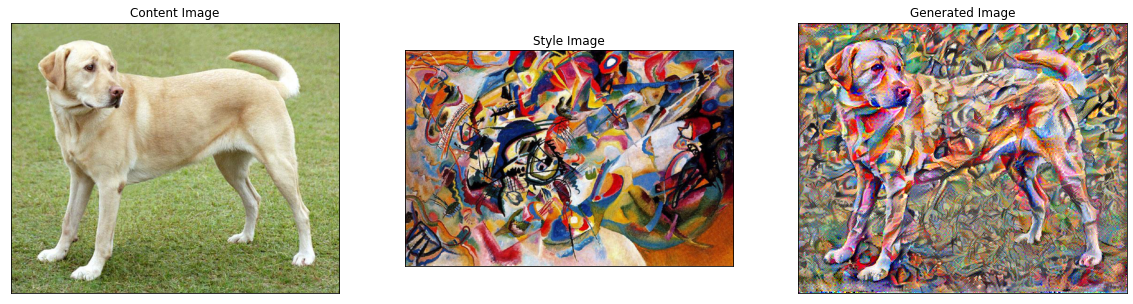

In [29]:
show_results(best, content_path, style_path)

## Trying on other Images

In [0]:
import os
img_dir = '/tmp/nst'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
    
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/d/d7/Green_Sea_Turtle_grazing_seagrass.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/0/0a/The_Great_Wave_off_Kanagawa.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/b/b4/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/0/00/Tuebingen_Neckarfront.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/6/68/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg
!wget --quiet -P /tmp/nst/ https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg

### Starry Night + Tuebingen

In [31]:
best_starry_night, best_loss = run_style_transfer('/tmp/nst/Tuebingen_Neckarfront.jpg',
                                                  '/tmp/nst/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

Total time: 169.7194s


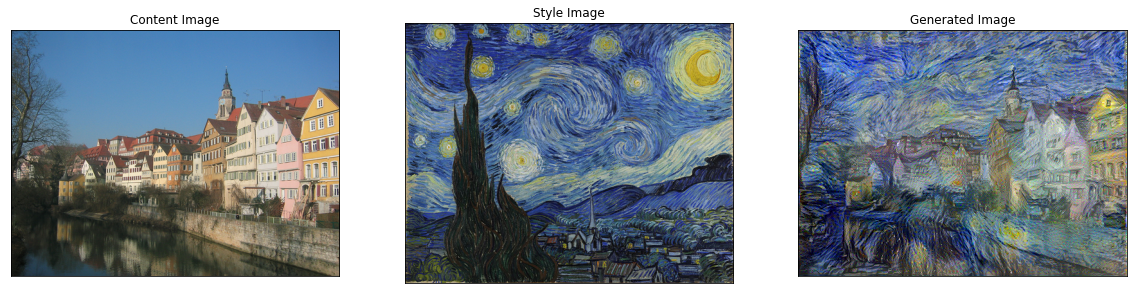

In [32]:
show_results(best_starry_night,
             '/tmp/nst/Tuebingen_Neckarfront.jpg',
             '/tmp/nst/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

### Pillars of Creation + Tuebingen

Total time: 170.1290s


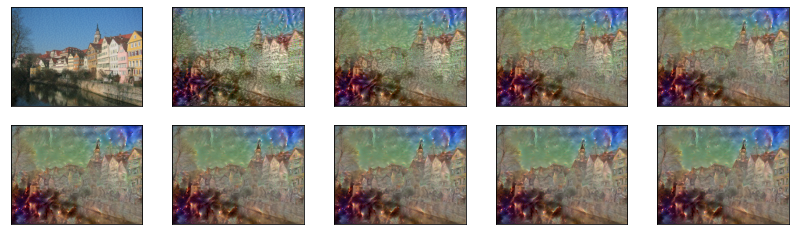

In [33]:
best_poc_tubingen, best_loss = run_style_transfer('/tmp/nst/Tuebingen_Neckarfront.jpg', 
                                                  '/tmp/nst/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg')

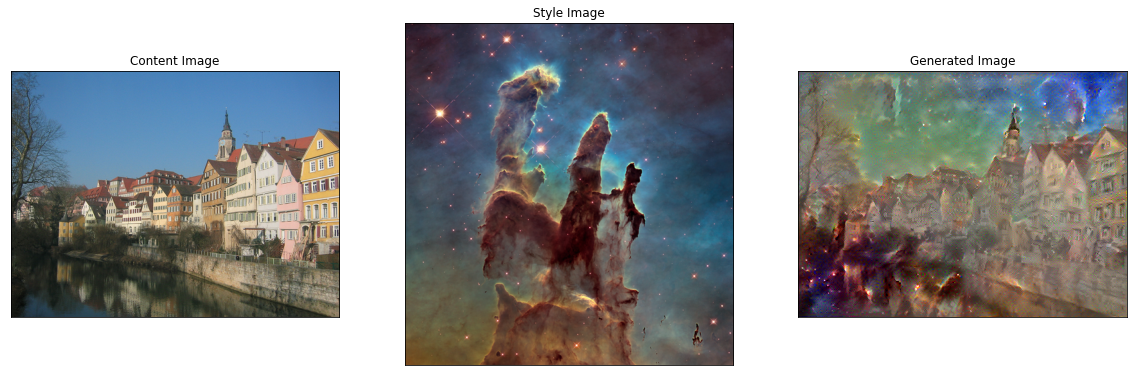

In [34]:
show_results(best_poc_tubingen, 
             '/tmp/nst/Tuebingen_Neckarfront.jpg',
             '/tmp/nst/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg')

### Kandinsky Composition 7 + Tuebingen

Total time: 170.8132s


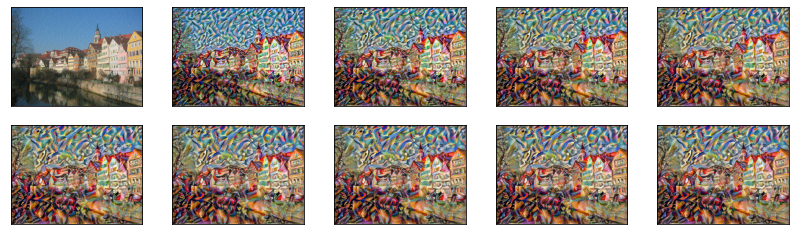

In [35]:
best_kandinsky_tubingen, best_loss = run_style_transfer('/tmp/nst/Tuebingen_Neckarfront.jpg',
                                                        '/tmp/nst/Vassily_Kandinsky,_1913_-_Composition_7.jpg')

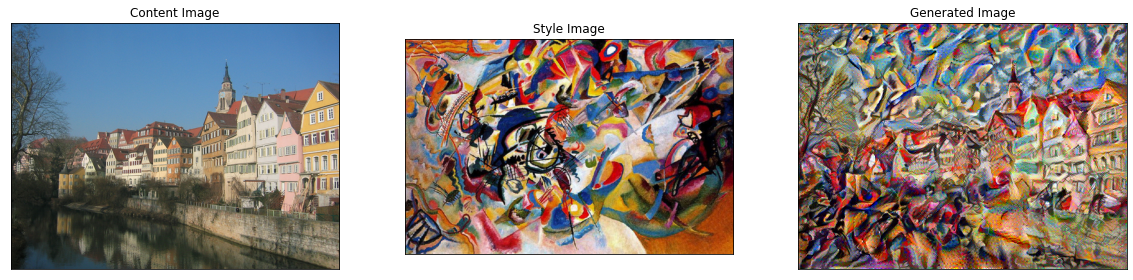

In [36]:
show_results(best_kandinsky_tubingen, 
             '/tmp/nst/Tuebingen_Neckarfront.jpg',
             '/tmp/nst/Vassily_Kandinsky,_1913_-_Composition_7.jpg')

### Pillars of Creation + Sea Turtle

Total time: 169.7821s


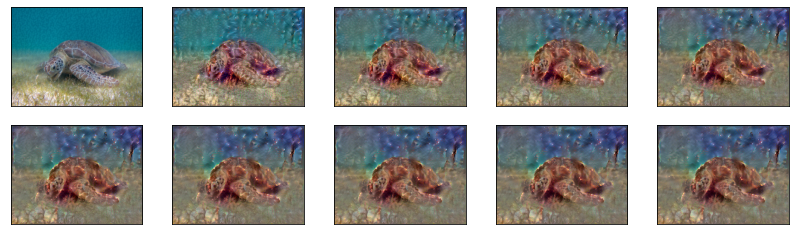

In [37]:
best_poc_turtle, best_loss = run_style_transfer('/tmp/nst/Green_Sea_Turtle_grazing_seagrass.jpg',
                                                '/tmp/nst/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg')

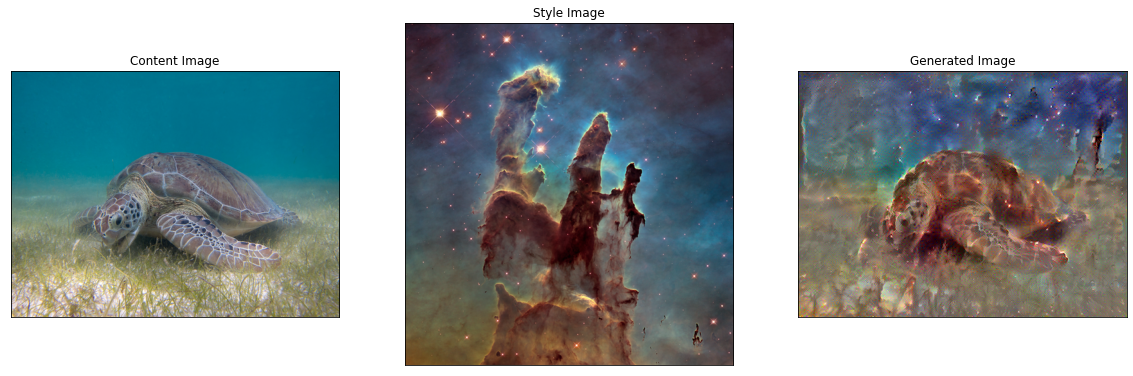

In [38]:
show_results(best_poc_turtle, 
             '/tmp/nst/Green_Sea_Turtle_grazing_seagrass.jpg',
             '/tmp/nst/Pillars_of_creation_2014_HST_WFC3-UVIS_full-res_denoised.jpg')